<h1 style="color:blue">Tarefa9.1: Calculadora de Aluguel - Machine Learning <h1>

<h2 style="color:green"> (1) Importando pacotes e módulos </h2>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

<h2 style="color:green"> (2)Declarando constantes </h2>

In [42]:
SEED = 42 # semente aleatória

<h2 style="color:green"> (3)Loading Data </h2>

In [2]:
url = 'https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-mar-21/main/manipulacao-de-dados/dados_tratados_ml.csv'
calc_imoveis_df = pd.read_csv(url)

In [3]:
calc_imoveis_df.head()

,aluguel,zona,area,quarto
0,1000.0,sul,48.0,2.0
1,1200.0,sul,67.0,3.0
2,1300.0,sul,65.0,2.0
3,1280.0,sul,65.0,2.0
4,1100.0,sul,50.0,2.0


In [4]:
calc_imoveis_df.shape 

(1152, 4)

In [5]:
calc_imoveis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aluguel  1152 non-null   float64
 1   zona     1152 non-null   object 
 2   area     1152 non-null   float64
 3   quarto   1152 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


In [29]:
calc_imoveis_df.describe()

,aluguel,area,quarto
count,1152.000000,1152.000000,1152.000000
mean,2497.282986,77.013889,1.984375
std,1743.603188,61.441147,0.808146
min,500.000000,12.000000,1.000000
25%,1471.000000,46.000000,1.000000
50%,2000.000000,60.000000,2.000000
75%,2900.000000,85.000000,2.000000
max,15000.000000,800.000000,5.000000


<h2 style="color:green"> Separação dos aributos do DF </h2>

In [30]:
# X é zona, area, quarto 
# y aluguel

X = calc_imoveis_df.drop('aluguel', axis=1)
y = calc_imoveis_df['aluguel']

In [31]:
X.head()

,zona,area,quarto
0,sul,48.0,2.0
1,sul,67.0,3.0
2,sul,65.0,2.0
3,sul,65.0,2.0
4,sul,50.0,2.0


In [32]:
type(X)

pandas.core.frame.DataFrame

In [33]:
type(y)

pandas.core.series.Series

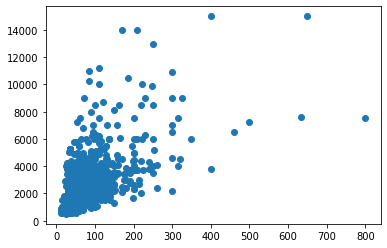

In [34]:
plt.scatter(calc_imoveis_df['area'],calc_imoveis_df["aluguel"])
plt.show()

In [35]:
X['zona'].unique()

# sul --> 1
# norte --> 2
# leste --> 3
# oeste --> 4 

array(['sul', 'norte', 'leste', 'oeste'], dtype=object)

<h2 style="color:green">Convertendo variaveis categoricas em numericas utilizando a tecnica de "one hot encoding"</h2>
<ul>
<li> sul   --> [0,0,0,1] </li>
<li> norte --> [0,0,1,0] </li>
<li> leste --> [0,1,0,0] </li>
<li> oeste --> [1,0,0,0] </li>
</ul>

In [36]:
X = pd.get_dummies(X)

In [37]:
X.head()

,area,quarto,zona_leste,zona_norte,zona_oeste,zona_sul
0,48.0,2.0,0,0,0,1
1,67.0,3.0,0,0,0,1
2,65.0,2.0,0,0,0,1
3,65.0,2.0,0,0,0,1
4,50.0,2.0,0,0,0,1


In [38]:
X.columns

Index(['area', 'quarto', 'zona_leste', 'zona_norte', 'zona_oeste', 'zona_sul'], dtype='object')

<h2 style="color:green"> Dividindo os dados entre treino e teste</h2>

In [43]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        train_size=0.8, 
                                                        random_state=SEED)


In [45]:
X_treino.shape

(921, 6)

In [46]:
X_teste.shape

(231, 6)

<h2 style="color:green"> Fazendo a transformação para log + 1 dos dados de treino </h2>

In [50]:
X_treino_lg = np.log1p(X_treino)
y_treino_lg = np.log1p(y_treino)

In [53]:
X_teste_lg = np.log1p(X_teste)
y_teste_lg = np.log1p(y_teste)

In [54]:
y_teste_lg

174     8.226038
754     7.378384
584     6.685861
240     7.673688
715     7.313887
          ...   
359     8.006701
63      8.006701
388     7.131699
1068    6.552508
409     7.417580
Name: aluguel, Length: 231, dtype: float64

<h2 style="color:green"> Usando um modelo de base Dummy Regressor (baseline ) </h2>

In [52]:
modelo_dr = DummyRegressor(strategy='mean')
modelo_dr.fit(X_treino_lg, y_treino_lg)

y_pred_dr = modelo_dr.predict(np.log1p(X_teste))



In [55]:
score_R2_dr = modelo_dr.score(X_teste_lg, y_teste_lg)

In [56]:
print(f" O R² do modelo de base que sempre prevê a média é = {score_R2_dr })")

 O R² do modelo de base que sempre prevê a média é = -106.30173544224438)


In [68]:
X_treino_lg.columns

Index(['area', 'quarto', 'zona_leste', 'zona_norte', 'zona_oeste', 'zona_sul'], dtype='object')

In [63]:
y_treino.shape

(921,)

In [57]:
# modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_treino_lg, y_treino_lg) # no ajuste a gente treina o modelo

# o modelo vai aprendendo como descrever 
# y = a*x + b estamos encontrando esses parâmetros no fit

LinearRegression()

Text(0, 0.5, 'Aluguel')

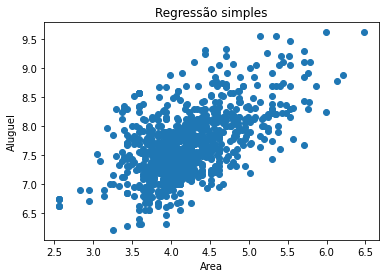

In [72]:
# Visualização gráfica do modelo.
plt.scatter(X_treino['area'], y_treino)
#plt.plot(X_teste_lg['area'], modelo_lr.predict(y_teste_lg), color = 'red')
plt.title ("Regressão simples")
plt.xlabel("Area")
plt.ylabel("Aluguel")

In [73]:
# area	quarto	zona_leste	zona_norte	zona_oeste	zona_sul
modelo_lr.predict([[50.0, 1, 0, 0, 0, 1]])

array([18.58434655])

In [74]:
modelo_lr.predict([[62.0, 2, 1, 0, 0, 0]]) # valor real foi 1.500


array([22.5447292])

In [75]:
1696-1500 

196

In [76]:
X.shape[0]*0.8, y[:921] # separando 80% para treino (fit)

(921.6,
 0      1000.0
 1      1200.0
 2      1300.0
 3      1280.0
 4      1100.0
         ...  
 916    3500.0
 917    2900.0
 918    2600.0
 919    3300.0
 920    1480.0
 Name: aluguel, Length: 921, dtype: float64)

In [ ]:
y[921:] # 20% para teste (predict)

In [77]:
print(f"Valor do score = {modelo_lr.score(X_treino, y_treino)}") # a métrica é o R2

Valor do score = -68.74832413442097


In [78]:
y_previsto =  modelo_lr.predict(X_treino)

In [79]:
y_previsto

array([3.30746988, 3.20340297, 3.01647076, 2.89416675, 3.39339823,
       2.93850172, 2.7417476 , 2.95468146, 3.00737319, 3.55842936,
       3.43469536, 2.75250732, 3.00263321, 3.11762043, 3.01647076,
       3.0000357 , 3.45038811, 3.19036571, 3.15429083, 3.0472902 ,
       3.19960565, 3.03500501, 2.87912456, 3.0000357 , 3.48176349,
       3.40066904, 2.85919732, 3.07352008, 2.95484671, 3.56044415,
       2.90680548, 2.96748543, 3.03750759, 2.99674987, 3.11947884,
       2.90680548, 2.88774882, 2.96748543, 3.04543361, 2.88408783,
       3.17220758, 2.92674615, 3.35171149, 3.33652629, 2.96188361,
       3.13050216, 3.12900027, 2.50181534, 2.79242433, 2.79444815,
       2.88625962, 2.82019999, 3.03036098, 3.16499661, 2.91135837,
       2.92674615, 2.69183659, 2.77612462, 2.88774882, 2.88774882,
       3.16627203, 2.87912456, 3.36543594, 3.07018204, 3.06362603,
       3.12573734, 3.09291271, 3.24825726, 3.58023128, 2.83649971,
       2.60922293, 2.95039427, 2.83649971, 2.92617663, 2.96748

In [80]:
print(f"Valores dos coeficientes = {modelo_lr.coef_}")

Valores dos coeficientes = [ 0.33890286 -0.00902911 -0.05579192 -0.0322836   0.04644491  0.04163061]


In [81]:
print(f" Valor do intercep = {modelo_lr.intercept_}")

 Valor do intercep = 1.606602162385775


Pontos importantes:

- seria interessante dividir o X e o y -> deem uma olhada no train_test_split do sklearn

- poderíamos usar outras métricas de regressão

- fazer o passo a passo: criar o modelo (reg) -> treinar o modelo (fit) -> prever com o modelo (predict) -> avaliar o modelo (score)